In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("ToyotaCorolla - MLR.csv")

In [3]:
df.head()


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

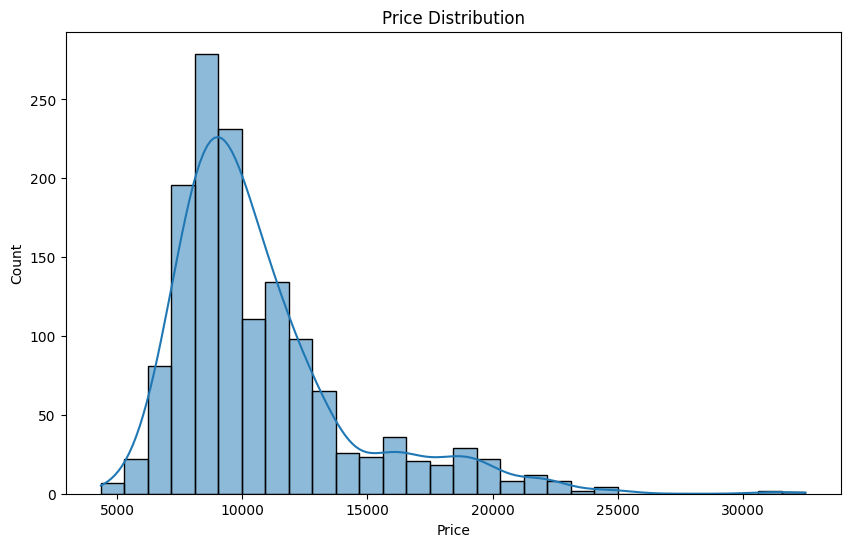

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.show()



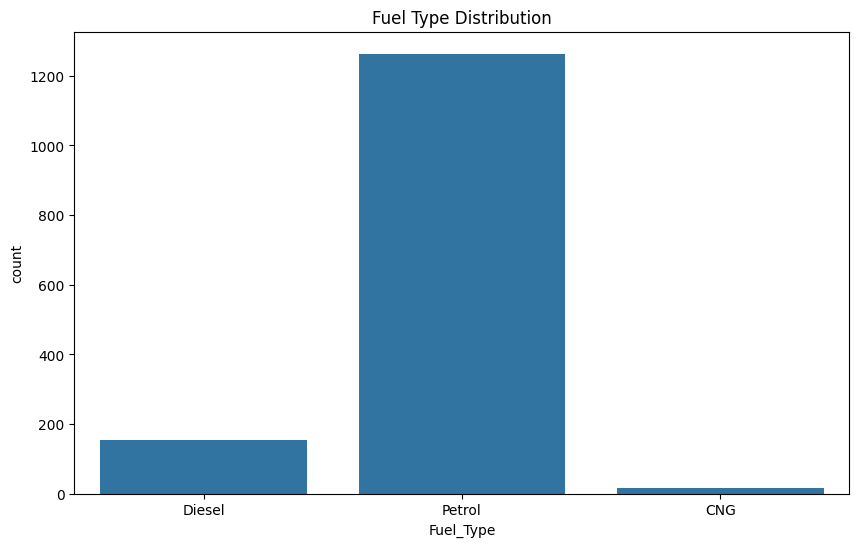

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(x='Fuel_Type', data=df)
plt.title('Fuel Type Distribution')
plt.show()

In [7]:
target=df["Price"]
feature=df.drop(columns=["Price"])

In [8]:
target

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

In [9]:
feature

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986,Diesel,90,0,2000,3,4,5,1165
1,23,72937,Diesel,90,0,2000,3,4,5,1165
2,24,41711,Diesel,90,0,2000,3,4,5,1165
3,26,48000,Diesel,90,0,2000,3,4,5,1165
4,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,70,16916,Petrol,86,0,1300,3,4,5,1015


In [10]:
ohe = OneHotEncoder(drop='first', sparse_output=False)
feature_ohe = ohe.fit_transform(feature[['Fuel_Type', 'Automatic']])
ohe_c = ohe.get_feature_names_out(['Fuel_Type', 'Automatic'])
feature= feature.drop(['Fuel_Type', 'Automatic'], axis=1)
feature = pd.concat([feature, pd.DataFrame(feature_ohe, columns=ohe_c, index=feature.index)], axis=1)


In [11]:
feature

,Age_08_04,KM,HP,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol,Automatic_1
0,23,46986,90,2000,3,4,5,1165,1.0,0.0,0.0
1,23,72937,90,2000,3,4,5,1165,1.0,0.0,0.0
2,24,41711,90,2000,3,4,5,1165,1.0,0.0,0.0
3,26,48000,90,2000,3,4,5,1165,1.0,0.0,0.0
4,30,38500,90,2000,3,4,5,1170,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,4,5,1025,0.0,1.0,0.0
1432,72,19000,86,1300,3,4,5,1015,0.0,1.0,0.0
1433,71,17016,86,1300,3,4,5,1015,0.0,1.0,0.0
1434,70,16916,86,1300,3,4,5,1015,0.0,1.0,0.0


In [12]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.2,random_state=44)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1148, 11)
(1148,)
(288, 11)
(288,)


In [13]:
sl=StandardScaler()

In [14]:
num_cols = ['Age_08_04', 'KM', 'HP', 'cc','Doors','Cylinders','Gears','Weight']
x_train[num_cols] = sl.fit_transform(x_train[num_cols])
x_test[num_cols] = sl.transform(x_test[num_cols])

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = x_train.columns
vif_data['VIF'] = [variance_inflation_factor(x_train.values, i) 
                   for i in range(x_train.shape[1])]

print("\nVariance Inflation Factors")
print(vif_data.sort_values(by='VIF', ascending=False))



Variance Inflation Factors
             Feature       VIF
8   Fuel_Type_Diesel  4.219254
7             Weight  3.745694
2                 HP  2.401002
0          Age_08_04  1.976556
1                 KM  1.969934
9   Fuel_Type_Petrol  1.573115
4              Doors  1.226983
3                 cc  1.190055
10       Automatic_1  1.185296
6              Gears  1.101346
5          Cylinders       NaN


## multiple linear regression

In [18]:
lr=LinearRegression()

In [19]:
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
y_pred=lr.predict(x_test)

In [21]:
print('Linear Regression R2:', r2_score(y_test, y_pred))
print('Linear Regression MSE:', mean_squared_error(y_test, y_pred))
print('Coefficients:', lr.coef_)


Linear Regression R2: 0.8495776999301378
Linear Regression MSE: 2026556.8914604932
Coefficients: [-2.24385997e+03 -6.22222711e+02  2.12812810e+02 -9.75377976e+00
 -4.40659124e+01  3.97903932e-12  1.01193922e+02  1.27212617e+03
  2.75796633e+02  1.65699421e+03  1.38612108e+02]


##  Ridge Regression

In [22]:
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
print('Ridge R2:', r2_score(y_test, y_pred_ridge))
print('Ridge MSE:', mean_squared_error(y_test, y_pred_ridge))
print('Ridge Coefficients:', ridge.coef_)

Ridge R2: 0.8501130655419371
Ridge MSE: 2019344.2051131958
Ridge Coefficients: [-2240.08186077  -628.14834217   212.90889084    -9.29397308
   -42.3655484      0.           102.61377761  1268.14530711
   157.85574588  1522.64948418   137.63127301]


## Lasso Regression

In [23]:
lasso = Lasso(alpha=1.0)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
print('Lasso R2:', r2_score(y_test, y_pred_lasso))
print('Lasso MSE:', mean_squared_error(y_test, y_pred_lasso))
print('Lasso Coefficients:', lasso.coef_)

Lasso R2: 0.8495145315804375
Lasso MSE: 2027407.9238828649
Lasso Coefficients: [-2240.66930552  -625.03695902   203.51580289    -6.09413303
   -43.62550133     0.           101.91097139  1277.76532539
    70.59626755  1487.19971794   112.95281004]


**Interview Question**

1. What is Normalization & Standardization and how is it helpful?

**Normalization-Scaling data between 0 and 1.**

**Standardization-Mean data around 0 with standard deviation of 1.**

It is helpful by a) Improving Models
                     b) Training becomes faster

2. What techniques can be used to address multicollinearity in multiple linear regression?

a) Collect more data
b) Combine related variables into one
c) Remove one of the correlated variables